# Marketing analysis for ABC (Alias) management

### 1.	Introduction

### 1.1	Background

ABC management company owns an amusement park close to New York city and its main service is the park management. The park is planning to expand and attract more visitors from New York. Each year, there are large amount of both new and return visitors. They come from all different backgrounds. Some are young teenagers with friends, and some are parents with kids, etc. They all reflex different consuming behaviors as well. Therefore, the ABC management need market analysis on the New York consuming behaviors and also its own exiting customer in order to target different groups of visitors marketing pitch so that they can increase the park traffic and increase the park revenue. ABC management also needs a prediction on total spending by new York visitors in order to know its potential revenue and marketing budget as well. 

### 1.2	Problem 

ABC management company has a hypothesis that some recent analysis of the leisure preferences of people in the Greater New York City area indicates that they prefer short getaways to long vacations. If this hypothesis is true, that will draw more visitors from New York in a constant growth rate. ABC needs segments of its existing park visitors to create targeting campaign and marketing materials. Then the prediction of park revenue is needed to budget marketing spending.

### 1.3	Interest

The interest of this analysis is to understand the New York consumers that related to ABC park and also understand the park existing visitors so that marketing strategies can be created more accurately targeting different segments of customer. 



### 2.	Data acquisition and cleaning 

### 2.1 Data sources 

The data for analysis on new York consuming behavior can be found through new York open data. I downloaded the csv file and import to python. There are one file for basic new Yorkers’ household and leisure spending, and another file of information for new York visitors to new England park. The rest company data was provided by ABC company. 

### 2.2 Data cleaning 

Since the new York consuming data was downloaded from the an relative official website. The information in the database is very comprehensive and complete. I used the commend to check if the missing values and erase them. 

### 3.	Exploratory Data Analysis

### 3.1 stats summary on New York consumer 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/nico/Desktop/bu/AD654/groupproject


Based on the summary over the new York consumer dataset, we found that median of household in new York contains 3 people that includes 1 kid and has adjusted gross income of $ 180436, the average spending on leisure annual is $7472 and the average spending on travelling nationwide is $4816. 

In [3]:
nyconsum = pd.read_csv('nycconsumers.csv')
nyconsum.head()

,householdID,state,county,householdpax,AGI,conusleisure,children,leisureavg
0,1,New York,Nassau,4,179883.69,7115.75,1,9193.40
1,2,New York,Nassau,2,169985.69,4967.27,1,7914.61
2,3,New York,Nassau,3,174330.05,3088.74,2,7885.29
3,4,New York,Nassau,5,192924.29,4841.22,2,5472.83
4,5,New York,Nassau,2,153443.55,5745.79,1,7859.36


In [4]:
nyconsum.isnull().sum()

householdID     0
state           0
county          0
householdpax    0
AGI             0
conusleisure    0
children        0
leisureavg      0
dtype: int64

In [5]:
nyconsum.groupby('children').describe()['leisureavg']

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,1631.0,7480.211097,1181.512236,3772.02,6716.210,7453.930,8265.560,11531.30
1,2760.0,7449.148913,1215.420146,2570.00,6652.545,7428.765,8265.465,11509.60
2,1481.0,7502.292431,1215.243593,4054.74,6658.020,7485.730,8387.730,11288.49
3,126.0,7516.860476,1151.203111,5186.90,6750.500,7576.985,8231.975,10535.90
4,2.0,7482.650000,582.627703,7070.67,7276.660,7482.650,7688.640,7894.63


In [6]:
nyconsum.groupby('householdpax').describe()['leisureavg']

,count,mean,std,min,25%,50%,75%,max
householdpax,,,,,,,,
1,992.0,7449.119677,1189.618623,3772.02,6675.8150,7364.490,8265.2000,11236.48
2,1251.0,7455.519880,1194.916970,2570.00,6650.5600,7462.680,8283.7400,11509.60
3,1504.0,7477.271323,1207.755883,3767.07,6668.6675,7445.880,8307.8550,11288.49
4,1213.0,7481.946249,1213.659475,3701.28,6659.2200,7473.300,8280.3500,11531.30
5,710.0,7494.749775,1220.554515,3765.75,6683.9250,7501.075,8336.8050,10579.75
6,253.0,7507.911304,1194.375681,4401.23,6736.0900,7607.360,8349.3100,10136.40
7,68.0,7491.763382,1323.828211,4286.98,6645.5200,7292.060,8428.5575,10120.10
8,7.0,7081.695714,590.726099,6511.05,6686.4150,6920.240,7348.9750,8069.80
9,2.0,7637.735000,1744.821338,6403.96,7020.8475,7637.735,8254.6225,8871.51


The household with 1 or 2 kids will spending more travelling both leisure or nationwide. But household of 2 people (most likely they are married but no kids) spend more than household of 3 people that includes 1 kid on leisure trip. This fact confirms the hypothesis that married couples in the new York consumers group prefer leisure trip better than long distance vacation. 

We examined the annual spending on leisure travel, a histogram can help visualize the spending distribution:

Text(0.5, 1.0, 'Histogram of leisureavg')

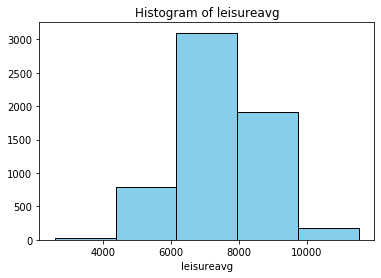

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.hist(nyconsum['leisureavg'],5,color="skyblue",ec = 'black')
plt.xlabel('leisureavg')
plt.title('Histogram of leisureavg')

We also tried to find relationships between geographic location and gross income to the leisure spending. The results for mean gross income per county and mean leisure travels spending per county are listed below by descending order:


In [8]:
nyconsum.groupby('county')['AGI'].mean().sort_values(ascending=False)

county
Westchester    202542.48515
Fairfield      191869.37832
Bergen         187061.47080
Morris         181537.75586
Hudson         178790.57408
New York       177136.37092
Nassau         176586.67408
Kings          176520.22080
Suffolk        175842.66726
Queens         165360.41478
Bronx          162137.82440
Passaic        153414.83836
Name: AGI, dtype: float64

In [9]:
nyconsum.groupby('county')['leisureavg'].mean().sort_values(ascending=False)

county
Passaic        7538.15932
Fairfield      7537.49430
Nassau         7526.01608
Suffolk        7505.84534
Bergen         7496.66408
Kings          7474.82102
Queens         7463.39362
Westchester    7453.86092
Morris         7447.50262
Hudson         7441.16172
Bronx          7426.38236
New York       7390.21844
Name: leisureavg, dtype: float64

We can identify the top 5 high income counties are: Westchester, Fairfield, Bergen, Morris and Hudson. However, the top 5 leisure spending counties are: Passaic, Fairfield, Nassau, Suffolk and Bergen. Among all, worth mentioned that Passaic seems to have the least gross income household, but they spend the most on leisure trips. 

Further to exam the relationship between gross income and leisure travel spending, and we found there is none linear relationship between those two aspects. The scatter plot is used to visualize if any correlation relationship existed:

Text(0.5, 1.0, 'Scatter Plot of income to leisure spending')

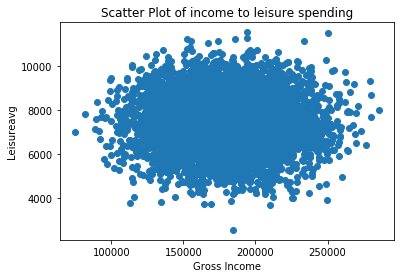

In [10]:
plt.scatter(nyconsum['AGI'],nyconsum['leisureavg'])
plt.xlabel('Gross Income')
plt.ylabel('Leisureavg')
plt.title('Scatter Plot of income to leisure spending')